In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DATA/train.csv')
df.sample(6)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
9668       0       0       0       0       0       0       0       0       0   
20637      3       0       0       0       0       0       0       0       0   
6983       1       0       0       0       0       0       0       0       0   
33336      1       0       0       0       0       0       0       0       0   
31695      3       0       0       0       0       0       0       0       0   
3408       6       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
9668        0  ...         0         0         0         0         0   
20637       0  ...         0         0         0         0         0   
6983        0  ...         0         0         0         0         0   
33336       0  ...         0         0         0         0         0   
31695       0  ...         0         0         0         0         0   
3408        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
9668          0         0         0         0         0  
20637         0         0         0         0         0  
6983          0         0         0         0         0  
33336         0         0         0         0         0  
31695         0         0         0         0         0  
3408          0         0         0         0         0  

[6 rows x 785 columns]

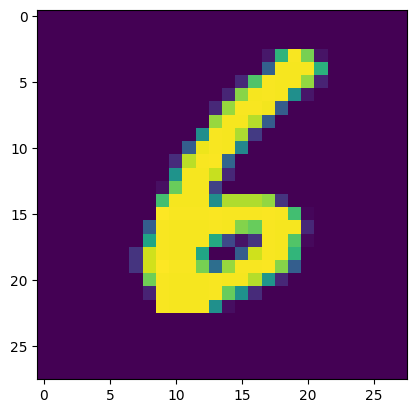

In [3]:
plt.imshow(df.iloc[27887,1:].values.reshape(28,28))

In [5]:
df.shape

(42000, 785)

In [41]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [43]:
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [19]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9391666666666667

In [22]:
pca = PCA(n_components=100)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9544047619047619

In [24]:
X_train.shape

(33600, 100)

In [39]:
pca = PCA(n_components=200)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape, X_test.shape

((33600, 200), (8400, 200))

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9507142857142857

In [49]:
X_train.shape

(33600, 784)

In [52]:
for i in range(1, 784):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    
    print("For PCA dim: ",i, " ",accuracy_score(y_test, y_pred))
    

For PCA dim:  1   0.2580952380952381
For PCA dim:  2   0.3236904761904762
For PCA dim:  3   0.5104761904761905
For PCA dim:  4   0.6663095238095238
For PCA dim:  5   0.7378571428571429
For PCA dim:  6   0.8227380952380953
For PCA dim:  7   0.8436904761904762
For PCA dim:  8   0.8721428571428571
For PCA dim:  9   0.886547619047619
For PCA dim:  10   0.9055952380952381
For PCA dim:  11   0.9116666666666666
For PCA dim:  12   0.9184523809523809
For PCA dim:  13   0.9276190476190476
For PCA dim:  14   0.9351190476190476
For PCA dim:  15   0.9384523809523809
For PCA dim:  16   0.9379761904761905
For PCA dim:  17   0.9407142857142857
For PCA dim:  18   0.94
For PCA dim:  19   0.9425
For PCA dim:  20   0.9442857142857143
For PCA dim:  21   0.9438095238095238
For PCA dim:  22   0.9441666666666667
For PCA dim:  23   0.9442857142857143
For PCA dim:  24   0.9457142857142857
For PCA dim:  25   0.9484523809523809
For PCA dim:  26   0.9479761904761905
For PCA dim:  27   0.9478571428571428
For PCA di

In [53]:
pca = PCA(n_components=2)
X_train_trf2 = pca.fit_transform(X_train)
X_test_trf2 = pca.transform(X_test)

In [55]:
X_train_trf2

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [56]:
import plotly.express as px
y_train_trf2 = y_train.astype(str)
fig = px.scatter(x=X_train_trf2[:, 0],
                 y=X_train_trf2[:, 1],
                 color=y_train_trf2,
                 color_discrete_sequence=px.colors.qualitative.G10
)
fig.show()

In [57]:
pca = PCA(n_components=3)
X_train_trf3 = pca.fit_transform(X_train)
X_test_trf3 = pca.transform(X_test)
X_train_trf3

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [62]:
import plotly.express as px
y_train_trf3 = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf3[:, 0],
                 y=X_train_trf3[:, 1],
                 z=X_train_trf3[:, 2],
                 color=y_train_trf3)
fig.update_layout(
                     margin=dict(l=20, r=20, t=20, b=20)
                 )
fig.show()

In [63]:
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [66]:
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [69]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [70]:
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926968, 3.80423901])

## Optimum number of PCA

In [71]:
pca = PCA(n_components=None)
X_train_trf_final = pca.fit_transform(X_train)
X_test_trf_final = pca.transform(X_test)

In [72]:
pca.explained_variance_ratio_.shape

(784,)

In [73]:
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [74]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

## Applying Cumulative sum

In [75]:
import numpy as np

In [76]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

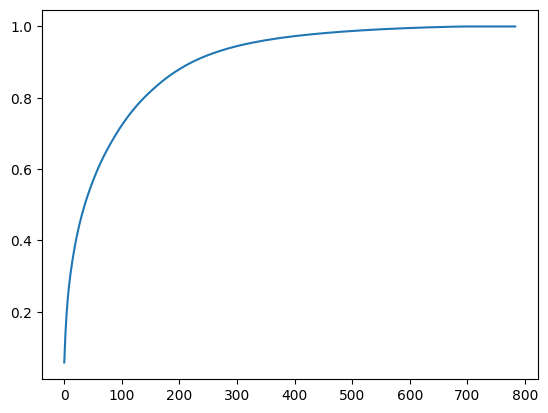

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))